# 特征工程

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb

import warnings
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss
warnings.filterwarnings('ignore')

In [298]:
data_train =pd.read_csv('train.csv')
data_test_a = pd.read_csv('testA.csv')

## 预处理

In [299]:
#将policyCode这一列删除
data_train = data_train.drop(['policyCode'], axis = 1)
data_test_a = data_test_a.drop(['policyCode'], axis = 1)

In [300]:
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns)))
label = 'isDefault'
numerical_fea.remove(label)

In [301]:
#查看缺失值情况
data_train.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  1
regionCode                0
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
n0                    40270
n1                    40270
n2                    40270
n3                    40270
n4                  

In [302]:
data_train.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  1
regionCode                0
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
n0                    40270
n1                    40270
n2                    40270
n3                    40270
n4                  

# 特征预处理

In [303]:
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns)))
label = 'isDefault'
numerical_fea.remove(label)

In [304]:
#查看缺失值情况
data_train.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  1
regionCode                0
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
n0                    40270
n1                    40270
n2                    40270
n3                    40270
n4                  

In [305]:
data_train.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  1
regionCode                0
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
n0                    40270
n1                    40270
n2                    40270
n3                    40270
n4                  

In [306]:
#查看类别特征
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

时间格式处理

In [307]:
#转化成时间格式
for data in [data_train, data_test_a]:
    data['issueDate'] = pd.to_datetime(data['issueDate'],format='%Y-%m-%d')
    startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
    #构造时间特征
    data['issueDateDT'] = data['issueDate'].apply(lambda x: x-startdate).dt.days

In [308]:
data_train['employmentLength'].value_counts(dropna=False).sort_index()
data_test_a['employmentLength'].value_counts(dropna=False).sort_index()

1 year       13182
10+ years    65772
2 years      18207
3 years      16011
4 years      11833
5 years      12543
6 years       9328
7 years       8823
8 years       8976
9 years       7594
< 1 year     15989
NaN          11742
Name: employmentLength, dtype: int64

Object转化为数值类型

In [309]:
def employmentLength_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])
for data in [data_train, data_test_a]:
    data['employmentLength'].replace(to_replace='10+ years', value='10 years', inplace=True)
    data['employmentLength'].replace('< 1 year', '0 years', inplace=True)
    data['employmentLength'] = data['employmentLength'].apply(employmentLength_to_int)

In [310]:
data['employmentLength'].value_counts(dropna=False).sort_index()


0.0     15989
1.0     13182
2.0     18207
3.0     16011
4.0     11833
5.0     12543
6.0      9328
7.0      8823
8.0      8976
9.0      7594
10.0    65772
NaN     11742
Name: employmentLength, dtype: int64

对earliesCreditLine进行预处理

In [311]:
data_train['earliesCreditLine'].sample(5)

742750    Apr-2001
502666    Jul-1997
519942    Feb-2007
347666    Dec-2004
741072    May-2001
Name: earliesCreditLine, dtype: object

In [312]:
for data in [data_train, data_test_a]:
    data['earliesCreditLine'] = data['earliesCreditLine'].apply(lambda s: int(s[-4:]))

对类别特征处理

In [313]:
# 部分类别特征
cate_features = ['grade', 'subGrade', 'employmentTitle', 'homeOwnership', 'verificationStatus', 'purpose',  'regionCode', 
                 'applicationType', 'initialListStatus', 'title']
for f in cate_features:
    print(f, '类型数：', data[f].nunique())

grade 类型数： 7
subGrade 类型数： 35
employmentTitle 类型数： 79282
homeOwnership 类型数： 6
verificationStatus 类型数： 3
purpose 类型数： 14
regionCode 类型数： 51
applicationType 类型数： 2
initialListStatus 类型数： 2
title 类型数： 12058


对等级类别进行标签编码

In [314]:
for data in [data_train, data_test_a]:
    data['grade'] = data['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

对于高纬度非等级变量进行独热编码

In [315]:
# 高维类别特征需要进行转换
for col in tqdm(['employmentTitle', 'postCode', 'title','subGrade']):
    le = LabelEncoder()
    le.fit(list(data_train[col].astype(str).values) + list(data_test_a[col].astype(str).values))
    data_train[col] = le.transform(list(data_train[col].astype(str).values))
    data_test_a[col] = le.transform(list(data_test_a[col].astype(str).values))
print('Label Encoding 完成')

100%|██████████| 4/4 [00:05<00:00,  1.32s/it]

Label Encoding 完成


转化一下非正态分布的数据用于后面的knn填补

In [316]:


"""
#效果不好，不使用
#对ficoRangeLow进行log转化
for data in [data_train, data_test_a]:
    data['ficoRangeLow'] = np.log1p(data['ficoRangeLow'])

#对ficoRangeHigh进行log转化
for data in [data_train, data_test_a]:
    data['ficoRangeHigh'] = np.log1p(data['ficoRangeHigh'])

#对regionCode进行log转化
for data in [data_train, data_test_a]:
    data['regionCode'] = np.log1p(data['regionCode'])

#对postcode进行log转化
for data in [data_train, data_test_a]:
    data['postCode'] = np.log1p(data['postCode'])

#对inserertRate进行log转化
for data in [data_train, data_test_a]:
    data['interestRate'] = np.log1p(data['interestRate'])
"""

"\n#效果不好，不使用\n#对ficoRangeLow进行log转化\nfor data in [data_train, data_test_a]:\n    data['ficoRangeLow'] = np.log1p(data['ficoRangeLow'])\n\n#对ficoRangeHigh进行log转化\nfor data in [data_train, data_test_a]:\n    data['ficoRangeHigh'] = np.log1p(data['ficoRangeHigh'])\n\n#对regionCode进行log转化\nfor data in [data_train, data_test_a]:\n    data['regionCode'] = np.log1p(data['regionCode'])\n\n#对postcode进行log转化\nfor data in [data_train, data_test_a]:\n    data['postCode'] = np.log1p(data['postCode'])\n\n#对inserertRate进行log转化\nfor data in [data_train, data_test_a]:\n    data['interestRate'] = np.log1p(data['interestRate'])\n"

# 填补缺失值

In [317]:
#使用knn填充数值缺失值
#数据量太大了跑不动

"""
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
numeric_columns = data_train.select_dtypes(include = [np.number, 'float']).columns.to_list()
selected_stocks = data_train[numeric_columns]
imputer.fit(selected_stocks)
data_train[numeric_columns] = imputer.transform(data_train[numeric_columns])
"""

"\nfrom sklearn.impute import KNNImputer\nimputer = KNNImputer(n_neighbors=5)\nnumeric_columns = data_train.select_dtypes(include = [np.number, 'float']).columns.to_list()\nselected_stocks = data_train[numeric_columns]\nimputer.fit(selected_stocks)\ndata_train[numeric_columns] = imputer.transform(data_train[numeric_columns])\n"

In [318]:
#查看缺失值情况
data_train.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           0
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  0
regionCode                0
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     0
n0                    40270
n1                    40270
n2                    40270
n3                    40270
n4                  

## 异常值的处理

这里使用3西格玛原则进行排异常值

In [319]:
def find_outliers_by_3segama(data,fea):
    data_std = np.std(data[fea])
    data_mean = np.mean(data[fea])
    outliers_cut_off = data_std * 3
    lower_rule = data_mean - outliers_cut_off
    upper_rule = data_mean + outliers_cut_off
    data[fea+'_outliers'] = data[fea].apply(lambda x:str('异常值') if x > upper_rule or x < lower_rule else '正常值')
    return data

for fea in numerical_fea:
    data_train = find_outliers_by_3segama(data_train,fea)
    print(data_train[fea+'_outliers'].value_counts())
    print(data_train.groupby(fea+'_outliers')['isDefault'].sum())
    print('*'*10)

正常值    800000
Name: id_outliers, dtype: int64
id_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    800000
Name: loanAmnt_outliers, dtype: int64
loanAmnt_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    800000
Name: term_outliers, dtype: int64
term_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    794259
异常值      5741
Name: interestRate_outliers, dtype: int64
interestRate_outliers
异常值      2916
正常值    156694
Name: isDefault, dtype: int64
**********
正常值    792046
异常值      7954
Name: installment_outliers, dtype: int64
installment_outliers
异常值      2152
正常值    157458
Name: isDefault, dtype: int64
**********
正常值    800000
Name: employmentTitle_outliers, dtype: int64
employmentTitle_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    799701
异常值       299
Name: homeOwnership_outliers, dtype: int64
homeOwnership_outliers
异常值        62
正常值    159548
Name: isDefault, dtype: int64
**********
正常值    793973
异常值      

In [320]:
#将异常值筛出
#删除异常值
for fea in numerical_fea:
    data_train = data_train[data_train[fea+'_outliers']=='正常值']
    data_train = data_train.reset_index(drop=True) 

# 特征选择

 绘制相关性热图看一下

In [321]:
data_train.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5_outliers,n6_outliers,n7_outliers,n8_outliers,n9_outliers,n10_outliers,n11_outliers,n12_outliers,n13_outliers,n14_outliers
0,0,35000.0,5,19.52,917.97,5,21,192025,2.0,2,...,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值
1,1,18000.0,5,18.49,461.90,4,16,104733,5.0,0,...,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值
2,2,12000.0,5,16.99,298.17,4,17,189509,8.0,0,...,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值
3,6,2050.0,3,7.69,63.95,1,3,70697,9.0,0,...,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值
4,7,11500.0,3,14.98,398.54,3,12,99661,1.0,1,...,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值


In [322]:
numerical_fea

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

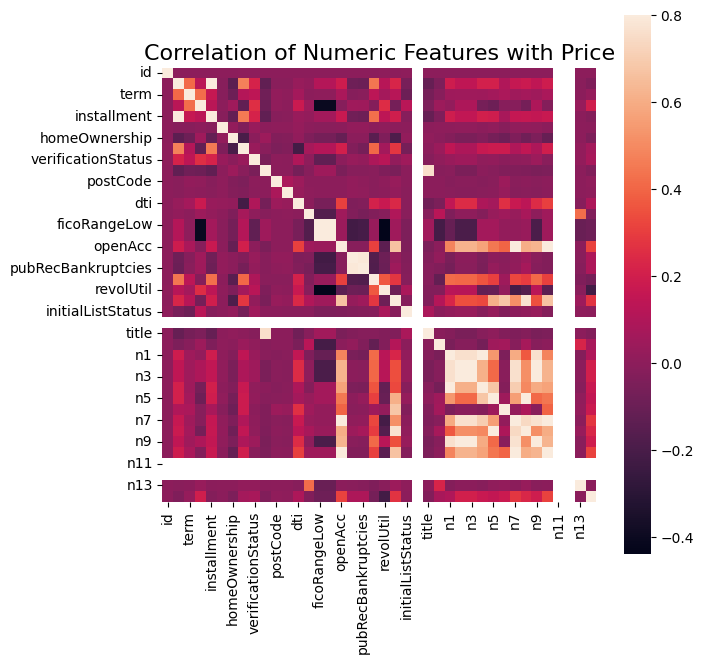

In [323]:
data_numeric = data_train[numerical_fea]
correlation = data_numeric.corr()

f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)
plt.show()


In [324]:
data_train.isnull().sum()

id              0
loanAmnt        0
term            0
interestRate    0
installment     0
               ..
n10_outliers    0
n11_outliers    0
n12_outliers    0
n13_outliers    0
n14_outliers    0
Length: 87, dtype: int64

In [325]:
data_test_a.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           0
employmentLength      11742
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
purpose                   0
postCode                  0
regionCode                0
dti                      61
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      116
revolBal                  0
revolUtil               127
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     0
n0                    10111
n1                    10111
n2                    10111
n3                    10111
n4                     8394
n5                  

In [326]:
#基于树模型的特征选择
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel


In [327]:
#"纵向用缺失值上面的值替换缺失值"
data_train = data_train.fillna(axis=0,method='ffill')
data_test_a = data_test_a.fillna(axis=0,method='ffill')

In [328]:

#划分数据集
y_train = data_train['isDefault']
#将剩下的数据列作为特征
X_train = data_train.drop(['isDefault'], axis=1)
X_train=X_train[numerical_fea]
X_test=data_test_a[numerical_fea]

In [329]:
y_train.shape

(637419,)

In [330]:
from tkinter import _test


feat_labels = X_train.columns

clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

clf.fit(X_train, y_train)

for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

model = SelectFromModel(clf, prefit=True)
X_train = model.transform(X_train)
X_test=model.transform(X_test)
X_train

('id', 0.04911269991401146)
('loanAmnt', 0.036948144450192316)
('term', 0.019226425943742635)
('interestRate', 0.0738169645470933)
('installment', 0.04727027972976829)
('employmentTitle', 0.04829056653051308)
('homeOwnership', 0.009977097997808134)
('annualIncome', 0.046410681288794525)
('verificationStatus', 0.010848415463014611)
('purpose', 0.011138947826488988)
('postCode', 0.046757676249569495)
('regionCode', 0.03582366124957896)
('dti', 0.054587137591396974)
('delinquency_2years', 0.006837234913295032)
('ficoRangeLow', 0.02466984868251132)
('ficoRangeHigh', 0.024825083542222622)
('openAcc', 0.024675984880270653)
('pubRec', 0.005692056896200992)
('pubRecBankruptcies', 0.0038604651217504517)
('revolBal', 0.04950225216015843)
('revolUtil', 0.047614541004084805)
('totalAcc', 0.03571837136823599)
('initialListStatus', 0.006600388881789032)
('applicationType', 0.0)
('title', 0.018562870671460792)
('n0', 0.009588619719883274)
('n1', 0.01884601168693413)
('n2', 0.016316071173681657)
('n3'

array([[0.00000e+00, 3.50000e+04, 1.95200e+01, ..., 9.00000e+00,
        8.00000e+00, 1.20000e+01],
       [1.00000e+00, 1.80000e+04, 1.84900e+01, ..., 9.00000e+00,
        8.00000e+00, 1.20000e+01],
       [2.00000e+00, 1.20000e+04, 1.69900e+01, ..., 0.00000e+00,
        2.10000e+01, 5.00000e+00],
       ...,
       [7.99997e+05, 6.00000e+03, 1.33300e+01, ..., 4.00000e+00,
        2.60000e+01, 1.00000e+01],
       [7.99998e+05, 1.92000e+04, 6.92000e+00, ..., 1.00000e+01,
        6.00000e+00, 2.20000e+01],
       [7.99999e+05, 9.00000e+03, 1.10600e+01, ..., 3.00000e+00,
        4.00000e+00, 8.00000e+00]])

In [331]:
X_train.shape

(637419, 15)

# 建模预测

**首先尝试基本模型**

使用xgboost

In [332]:
#使用xgboost进行建模
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

X_train,X_vali, y_train, y_vali = train_test_split(X_train, y_train, test_size=0.2, random_state=2020)#数据集划分，划分为训练集和验证集

model = xgb.XGBClassifier(max_depth=6,
            learning_rate=0.1,
            n_estimators=1000,
            objective='binary:logistic',
            booster='gbtree')

model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_vali, y_vali)], eval_metric='logloss', verbose=10, early_stopping_rounds=100)

vali_pred = model.predict(X_vali)
accuracy = accuracy_score(y_vali, vali_pred)
print('验证集准确率：', accuracy)

[0]	validation_0-logloss:0.48855	validation_1-logloss:0.48836
[10]	validation_0-logloss:0.45901	validation_1-logloss:0.45961
[20]	validation_0-logloss:0.45205	validation_1-logloss:0.45344
[30]	validation_0-logloss:0.44926	validation_1-logloss:0.45150
[40]	validation_0-logloss:0.44716	validation_1-logloss:0.45023
[50]	validation_0-logloss:0.44564	validation_1-logloss:0.44947
[60]	validation_0-logloss:0.44439	validation_1-logloss:0.44892
[70]	validation_0-logloss:0.44335	validation_1-logloss:0.44859
[80]	validation_0-logloss:0.44240	validation_1-logloss:0.44838
[90]	validation_0-logloss:0.44146	validation_1-logloss:0.44813
[100]	validation_0-logloss:0.44060	validation_1-logloss:0.44794
[110]	validation_0-logloss:0.43979	validation_1-logloss:0.44785
[120]	validation_0-logloss:0.43914	validation_1-logloss:0.44775
[130]	validation_0-logloss:0.43836	validation_1-logloss:0.44765
[140]	validation_0-logloss:0.43764	validation_1-logloss:0.44758
[150]	validation_0-logloss:0.43691	validation_1-log

[[101773    995]
 [ 23544   1172]]


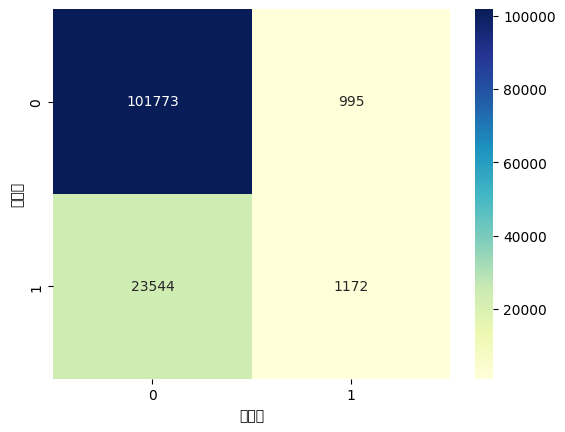

In [333]:
#绘制混淆矩阵
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    f, ax = plt.subplots()
    C2 = confusion_matrix(y_true, y_pred)
    print(C2) #打印出来看看
    sns.heatmap(C2,annot=True,fmt = "d",cmap="YlGnBu",xticklabels=classes,yticklabels=classes)
    plt.xlabel('预测值')
    plt.ylabel('真实值')

plot_confusion_matrix(y_vali,vali_pred,[0,1])

使用逻辑回归

In [334]:
#使用logistics回归
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#特征归一化
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_val = scaler.transform(X_vali)

lr = LogisticRegression()
lr.fit(x_train, y_train)
vali_pred = lr.predict(x_val)
accuracy = accuracy_score(y_vali, vali_pred)
print('验证集准确率：', accuracy)

验证集准确率： 0.8060540930626588


[[101425   1343]
 [ 23382   1334]]


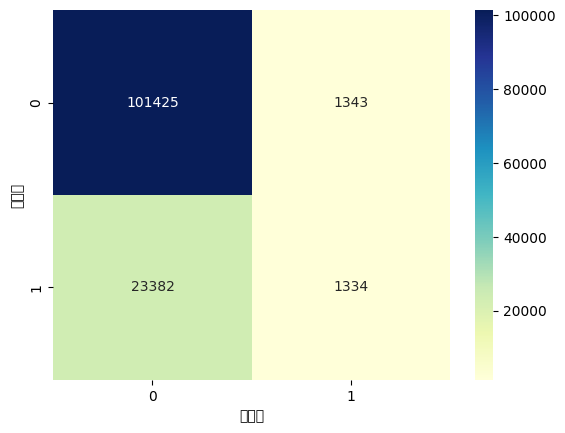

In [335]:
#绘制混淆矩阵
plot_confusion_matrix(y_vali,vali_pred,[0,1])

## 预测测试集

In [337]:
#使用xgboost进行预测测试集,将结果为1的概率输出到csv文件
y_test = model.predict_proba(X_test)[:,1]

#将结果转化为提交文件
sub = pd.DataFrame()
sub['id'] = data_test_a['id']
sub['isDefault'] = y_test
sub.to_csv('./sub.csv',index=False)


官方评测结果AUC：0.7049